In [75]:
from tensorflow.keras.utils import to_categorical
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,Activation
import numpy as np
from tensorflow.math import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import joblib
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score
from sklearn.metrics import classification_report
from tensorflow.keras.models import load_model
import seaborn as sns
import cv2

##loading data from the openML website

In [76]:
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


The dataset has a 70000 images and this is in tabular data that means, it has a 70000 rows, 784 columns and one label column

#pre processing


just displaying the first five rows and columns


In [77]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

checking wheather any missing values are there in data

In [79]:
missing_values = X.isnull().sum()
if missing_values.any():
    print("Missing values found:")
    print(missing_values)
else:
    print("No missing values found.")

No missing values found.


In [7]:
missing_values = y.isnull().sum()
if missing_values.any():
    print("Missing values found:")
    print(missing_values)
else:
    print("No missing values found.")

No missing values found.


In [80]:
y.head()

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

### Data set are in dataframe so changing to numpy so that we can display the image

In [81]:
X=X.to_numpy()

In [82]:
type(X)

numpy.ndarray

In [83]:
# unique values in y
print(np.unique(y))

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


displying the index 0 image

Text(0.5, 1.0, '4')

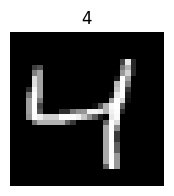

In [84]:
index=2
image = X[index].reshape(28,28)

fig, axes = plt.subplots(figsize=(2,2))
axes.imshow(image,cmap='gray')
axes.axis('off')
axes.set_title(y[index])

Displaying some rows and columns of the dataset with image

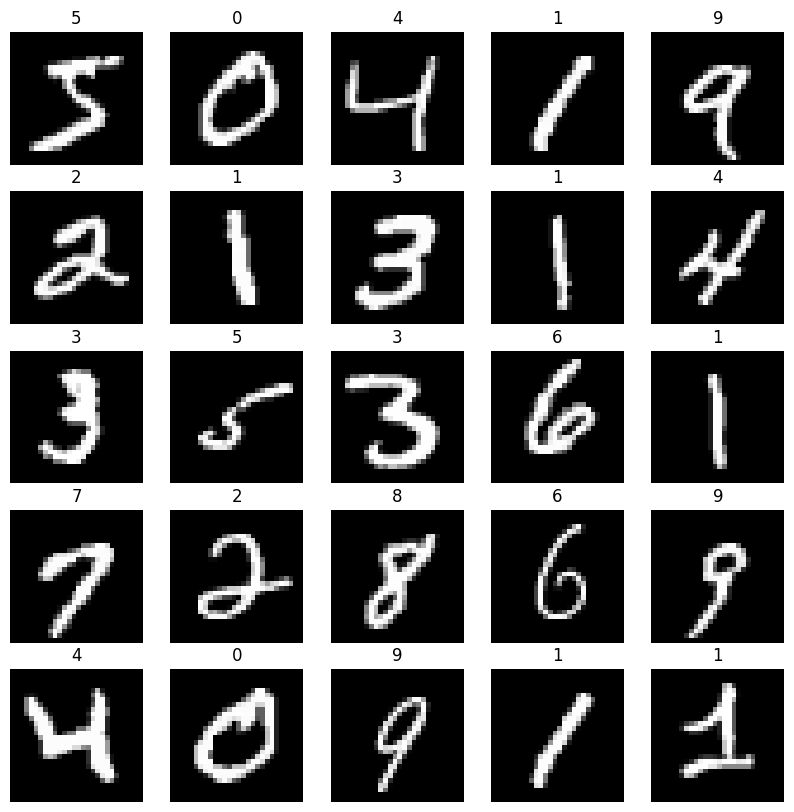

In [85]:
f,axes=plt.subplots(5,5,figsize=(10,10))
for i in range(5):
  for j in range(5):
    axes[i][j].imshow(X[5*i+j].reshape(28,28),cmap='gray')
    axes[i][j].axis('off')
    axes[i][j].set_title(y[5*i+j])

changing the X as integer as they are in float as all the values are from 0 to 255

In [86]:
X=X.astype(int)

In [194]:
y = y.astype(int)

Splitting the data set into training and test data  taking 60000 image as testing data and 10000 image as testing data

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=42) #

In [196]:
print(X_test.shape,X_train.shape,y_test.shape,y_train.shape)

(10000, 784) (60000, 784) (10000,) (60000,)


#Randomforest clssifier Algorithm

In [90]:
rf = RandomForestClassifier(n_estimators=100,random_state=42)

Training the data

In [91]:
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [92]:
y_train_pred=rf.predict(X_train)

In [93]:
y_pred=rf.predict(X_test)

In [94]:
score_rf_test= rf.score(X_test,y_test)
print("Test accuracy of rf is: ",round(score_rf_test*100,2),"%")

Test accuracy of rf is:  96.74 %


In [122]:
print(y_pred[10])

3


(-0.5, 27.5, 27.5, -0.5)

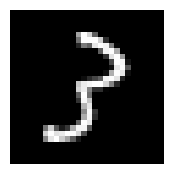

In [96]:
fig, axes = plt.subplots(figsize=(2,2))
axes.imshow(X_test[10].reshape(28,28),cmap='gray')
axes.axis('off')

In [97]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       983
           1       0.99      0.99      0.99      1152
           2       0.94      0.97      0.96       967
           3       0.96      0.95      0.95      1034
           4       0.96      0.97      0.97       906
           5       0.98      0.96      0.97       937
           6       0.98      0.99      0.98       961
           7       0.97      0.97      0.97      1055
           8       0.96      0.95      0.96       969
           9       0.96      0.94      0.95      1036

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [98]:
matrixX = confusion_matrix(y_test, y_pred)

Text(0.5, 47.7222222222222, 'predicted value')

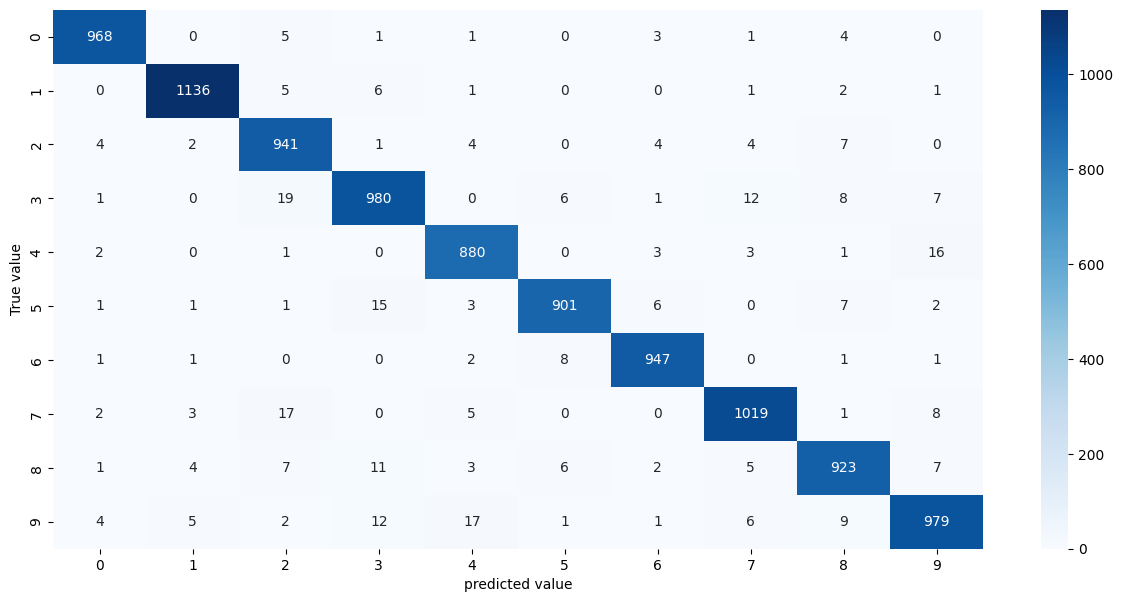

In [99]:
plt.figure(figsize=(15,7))
matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(matrixX,fmt='d',annot=True,cmap='Blues')
plt.ylabel('True value')
plt.xlabel('predicted value')

saving the model for later use


In [100]:
#joblib.dump(rf, '/content/drive/MyDrive/mlcvvvvva/rf_model.joblib')


In [32]:
import pickle
with open('/content/drive/MyDrive/mlcvvvvva/rf_model.pickle','wb') as handle:
  pickle.dump(rf,handle)

#Modeling the neural network

In [198]:
X_trainx= X_train.reshape(60000,28,28)
X_testx= X_test.reshape(10000,28,28)

Normalizing the value between 0 to 1 so that it will be easy for calculation

In [199]:
X_train_normalized = X_trainx / 255.0
X_test_normalized = X_testx / 255.0

In [200]:
#creating the sequential model
model = Sequential()

model.add(Flatten(input_shape=(28,28))) # Flatten layer to convert 28x28 input data into a flat 1D array
#1st layer
model.add(Dense(64))# its a first hidden layer with 64 neurons
model.add(Activation('relu')) #activation function to introduce non- linearity

#2nd layer
model.add(Dense(32))#second hidden layer with 32 neurons
model.add(Activation('relu'))

#3rd layer
model.add(Dense(32))# third hidden layer with 32 neurons
model.add(Activation('relu'))

#output layer
model.add(Dense(10))# output layer with 10 neurons
model.add(Activation('softmax'))

In [201]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 64)                50240     
                                                                 
 activation_8 (Activation)   (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 activation_9 (Activation)   (None, 32)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                1056      
                                                                 
 activation_10 (Activation)  (None, 32)               

In [202]:
# printing the length of the trainning model
print('total training model',len(X_train_normalized))

total training model 60000


In [203]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [204]:
model.fit(X_train_normalized,y_train,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 8s 3ms/step - loss: 0.3113 - accuracy: 0.9082
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1302 - accuracy: 0.9606
Epoch 3/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0924 - accuracy: 0.9713


In [216]:
# Evaluate the model on the test set
loss,accuracy=model.evaluate(X_test_normalized,y_test)
print("test accuracy",round(accuracy*100,2),"%")

313/313 [==============================] - 1s 3ms/step - loss: 0.1242 - accuracy: 0.9636
test accuracy 96.36 %


In [ ]:
y_pred_cnn=model.predict(X_test_normalized)

In [217]:
print(np.argmax(y_pred_cnn[0]))

8


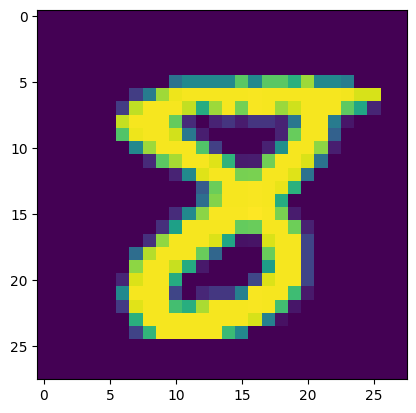

In [218]:
plt.imshow(X_test_normalized[0])

In [220]:
y_pred_cnn.shape

(10000, 10)

In [222]:
#converting to
y_pred_classes = np.argmax(y_pred_cnn, axis=1)

In [223]:
matrix = confusion_matrix(y_test, y_pred_classes)

In [224]:
import seaborn as sns

Text(0.5, 47.7222222222222, 'Predicted value')

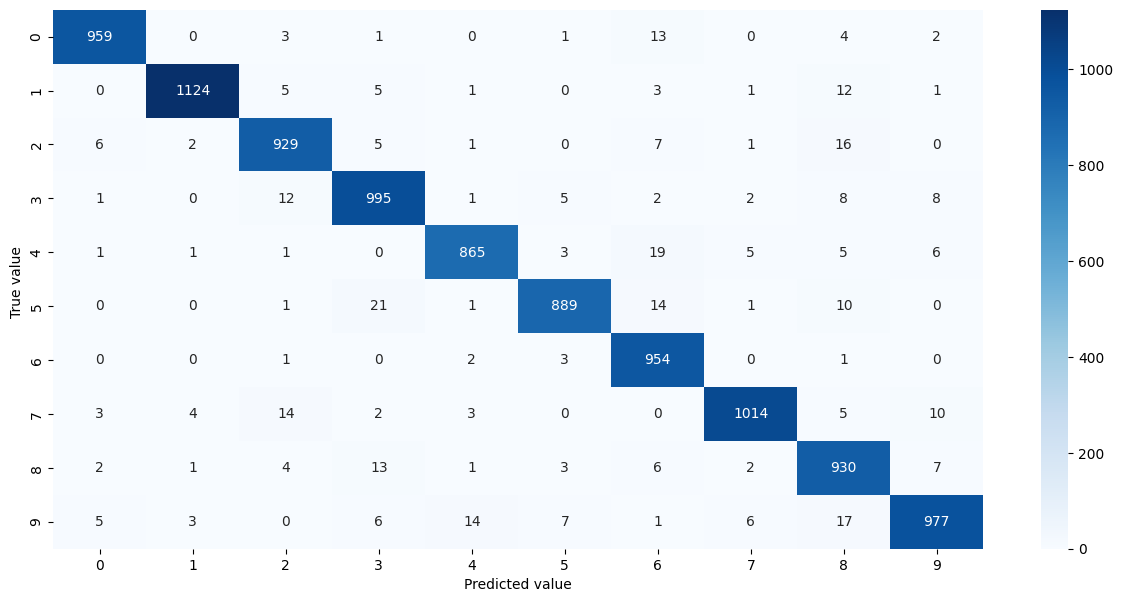

In [225]:
plt.figure(figsize=(15,7))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True value ')
plt.xlabel('Predicted value')

In [ ]:
#joblib.dump(rf, '/content/drive/MyDrive/mlcvvvvva/cnn_model.joblib')

In [231]:
import pickle
with open('/content/drive/MyDrive/mlcvvvvva/cnn_model.pickle','wb') as handle:
  pickle.dump(model,handle)

#Testing model for neural network


In [229]:
import cv2
from tensorflow.keras.models import load_model

In [239]:
with open('/content/drive/MyDrive/mlcvvvvva/cnn_model.pickle','rb') as handle:
  saved_model1 = pickle.load(handle)

In [238]:
#your_model = load_model('/content/drive/MyDrive/mlcvvvvva/cnn_model.h5')

In [251]:
img = cv2.imread('/content/drive/MyDrive/mlcvvvvva/test data /007.png')

In [252]:
img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

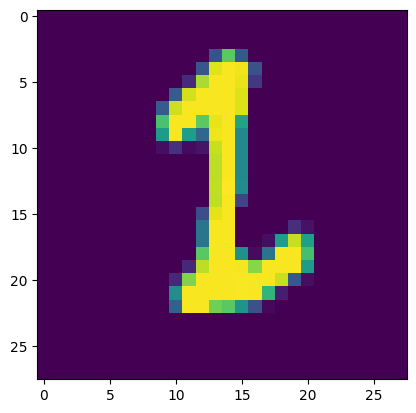

In [253]:
plt.imshow(img_gray)

In [254]:
from google.colab.patches import cv2_imshow

In [255]:
cv2_imshow(img_gray)

In [256]:
img_gray = img_gray.reshape(1,28,28)

In [257]:
predictions=saved_model1.predict(img_gray)

1/1 [==============================] - 0s 117ms/step


In [258]:
print(np.argmax(predictions))

1


# Testing model for random forest classifier

In [44]:
with open('/content/drive/MyDrive/mlcvvvvva/rf_model.pickle','rb') as handle:
  saved_model = pickle.load(handle)

In [ ]:
#your_model = joblib.load('/content/drive/MyDrive/mlcvvvvva/rf_model.joblib')

In [47]:
img = cv2.imread('/content/drive/MyDrive/mlcvvvvva/test data /016.png')

In [48]:
img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

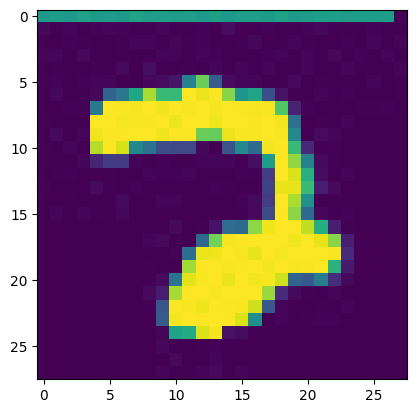

In [49]:
plt.imshow(img_gray)

In [50]:
img_gray = img_gray.reshape(1,784)

In [52]:
prediction= saved_model.predict(img_gray)

In [53]:
print(prediction)

[2]
